# CMM536 Topic 4 Laboratory (Solved)

In this activity you will use a database of **"features extracted"** to perform different types of classification.

## Installing the necessary packages

We will use `sklearn` and `scipy` for this activity. If you don't have these packages already, run the cell bellow:

In [ ]:
!pip install sklearn
!pip install scipy

## Loading the Data

We will use the `IRIS` database, which contains 150 samples of the sepal and petal lengths and widths from 3 different iris flower species: Setosa, Versicolor and Virginica.

![Fig 1: Iris dataset.](figs/iris.png)

This dataset is already available in Python by importing the `sklearn.datasets` function and using the following command:

In [1]:
## Load iris dataset
from sklearn import datasets
iris = datasets.load_iris()

Notice that we will **NOT** work with the actual images, but rather with the numerical information extracted from some real flower samples.

In fact, this dataset was presented in 1936 by a statistician called Ronald Fisher, and thus we don't even have access to the original images to extract some proper feature from!

The dataset is contained on a **dictionary-like** structure referred to as **sklearn.utils.Bunch**.

In [2]:
type(iris)

sklearn.utils.Bunch

If you print this dataset, you will see a lot of things contained:

In [3]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

Therefore, we need to extract each index of this dictionary into a different variables to understand and analyse them separately.

First, we will import the `features` into a variable called `data`:

In [4]:
data = iris['data']
print(data)
print(type(data))
print(data.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

The data is stored in a `numpy array` of 150 rows and 4 columns, each corresponding to the  measurements of a flower.

Then, we will import the `headers` of the data:

In [5]:
header = iris['feature_names']
print(header, type(header))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] <class 'list'>


**Why do you think the features and the header are stored separately?**

**TO HAVE THE DATA SEPARATELY FOR TRAINING ML ALGORITHMS**

Afterwards, we will import the **class/target**:

In [6]:
target = iris['target']
print(target, type(target), target.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] <class 'numpy.ndarray'> (150,)


The class/target is a `numpy array` which contains the **category** of each flowers.

Each sample is labelled as $0$, $1$ or $2$ instead of the iris type since the labels can be better used as numbers.

A separate key called **target_names** contains the name corresponding to each numerical label.

In [7]:
target_names = iris['target_names']
print(target_names, type(target_names), target_names.shape)

['setosa' 'versicolor' 'virginica'] <class 'numpy.ndarray'> (3,)


**Why do you think the target and the target names are stored separately?**

**BECAUSE THE MACHINE DOESN'T CARE ABOUT NAMES, JUST NUMBERS!**

In fact, We can use `list comprehension` to obtain a list of names instead of numerical labels

In [8]:
# Create a variable called "target_named" and store the actual categories
target_named = [target_names[t] for t in target]
print(target_named)

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicol

Finally, just in case you are interested, there is an entry called `DESC` containing the description of the dataset (a string):

In [9]:
iris['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

## Visualising the Data

Run the following code and analyse the output

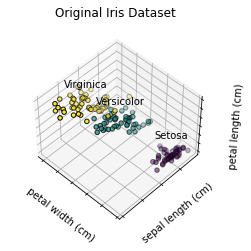

In [11]:
## Plot the ground truth data
## I don't understand fully what half of this code does!
import warnings; 
warnings.simplefilter('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# if you check "header" you will see that we have 4 features
# however, it is only possible to plot in 3D!
# Therefore, we choose 3 out of 4 features to plot our data
# I have tested beforehand all combinations and this is the one that works best
# Still, you can change the numbers to see what you get!

x_axis = 3 # 3 is petal width
y_axis = 0 # 0 is sepal length
z_axis = 2 # 2 is petal length

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
for name, label in [('Setosa', 0),('Versicolor', 1),('Virginica', 2)]:
    ax.text3D(data[target == label, x_axis].mean(),
              data[target == label, y_axis].mean(),
              data[target == label, z_axis].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
ax.scatter(data[:, 3],data[:, 0],data[:, 2],c=target.astype(np.float),edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel(header[x_axis])
ax.set_ylabel(header[y_axis])
ax.set_zlabel(header[z_axis])
ax.set_title('Original Iris Dataset')
ax.dist = 12
plt.show()

We can see that the features of the Setosas are notably distinct to the other two types. Therefore, we would expect that a machine learning algorithm is at least capable of identifying all Setosas correctly!

## Unsupervised Classification

Considering only the features and ignoring the target, we will use an algorithm called **K-means** to **cluster** the 150 iris samples into $k=3$ clusters.

* **NOTE:** When testing unsupervised learning, there is no need to split our dataset into training/validation/testing as we are ignoring our labels, therefore the expected output is compared against the actual labels of the data

To use this algorithm, we can import the function `Kmeans` from the `sklearn` module and execute it using the following input parameters (the explanation of the parameters can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [12]:
## Clustering data using K-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=1, max_iter=300, 
                tol=0.0001, random_state = 0,
                algorithm='auto').fit(data)

We then store the result of the training in a variable called `kmeans`, which contains the information of how these features can be grouped (i.e. clustered).

 We can visualise the resulting target by running the following cell:

In [13]:
# Visualise the target learned by the unsupervised classification algorithm
target_kmeans = kmeans.labels_
print(target_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


A similar code as the one used to visualise the original dataset can be used to plot the clustered data.

Notice that this time we will not use the target names, as clustering algorithms can only find a pattern in the data and separate it into groups:

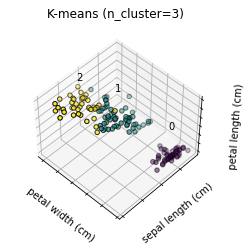

In [15]:
## Plot the results of K-means clustering
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
for name, label in [('0', 0),('1', 1),('2', 2)]:
    ax.text3D(data[target_kmeans == label, x_axis].mean(),
              data[target_kmeans == label, y_axis].mean(),
              data[target_kmeans == label, z_axis].mean() + 3, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
ax.scatter(data[:, 3],data[:, 0],data[:, 2],c=target_kmeans.astype(np.float),edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel(header[x_axis])
ax.set_ylabel(header[y_axis])
ax.set_zlabel(header[z_axis])
ax.set_title('K-means (n_cluster=3)')
ax.dist = 12
plt.show()

If we visualy copare both graphs, it appears that the clustering algorithm has clustered setosas as 0, versicolors as 2 and virginicas as 1, however in the original dataset versicolors and virgincas label numbers are opposite!

If we want to compare the similarity between the target obtained using the `K-means` algorithm with respect to the `ground truth`, first we need to exchanged labels "1" and "2" in `target_kmeans`:

In [16]:
## Exchange labels 1 and 2 in the target obtained using K-means
for i, label in enumerate(target_kmeans):
    if label==0:
        pass
    elif label==1:
        target_kmeans[i]=2
    elif label==2:
        target_kmeans[i]=1
print(target_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


Now we can compare the two lists by simply using the comparison operation sign and printing the outcome (we will also save it in a variable called `comparison` for future use):

In [17]:
## Comparison of targets
comparison = target_kmeans == target
print(comparison)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False  True False
 False False False False False  True  True False False False False  True
 False  True False  True False False  True  True False False False False
 False  True False False False False  True False False False  True False
 False False  True False False  True]


To know the **accuracy** of clustering each iris category, we can count and print in groups of 50 the comparisons:

In [18]:
# Verify the accuracy of clustering each iris category
print('Setosa', comparison[:50],'Accuracy', sum(comparison[:50])/len(comparison[:50]))
print('Versicolor', comparison[50:100],'Accuracy', sum(comparison[50:100])/len(comparison[50:100]))
print('Virginica', comparison[100:],'Accuracy', sum(comparison[100:])/len(comparison[100:]))

Setosa [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True] Accuracy 1.0
Versicolor [ True False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False] Accuracy 0.06
Virginica [False  True False False False False  True False False False False False
 False  True  True False False False False  True False  True False  True
 False False  True  True False False False False False  True False False
 False False  True False False False  True False False False  True False
 False  True] Accuracy 0.28


As expected, the Setosa type was easier to cluster compared to the other two types, whereas the Virginicas are harder to cluster!

## Splitting the Dataset

As mentioned previously, in unsupervised machine learning you can use your entire dataset to build the model, as the output can be compared with the ground truth.

If you do the same with a supervised machine learning model, you run the risk of **overfitting/overgeneralising** your model and obtaining something that just works for your samples, but not for new ones!

Therefore, the first thing we need to do is split the dataset in to `training` and `testing` data. For this activity, you are required to reserve **80% of the data for training** and **20% of the data for testing**.

You can either create your own code to do this division or use a function available elsewhere, just **make sure that samples of the three classes of iris flowers are present on both training and testing data!**.

In [19]:
## Use the following cell to split your dataset into training and testing
## Hint: Explore the train_test_split() function in sklearn
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
print(np.count_nonzero(y_train == 0),np.count_nonzero(y_train == 1),np.count_nonzero(y_train == 2))
print(np.count_nonzero(y_test == 0),np.count_nonzero(y_test == 1),np.count_nonzero(y_test == 2))

39 39 42
11 11 8


How would you modify your code to ensure that in both datasets there is a balanced number of samples (i.e. 40/40/40 on `training` and 10/10/10 on `testing`

In [20]:
## Use the following cell to split your dataset into training and testing guaranteeing balance
## Hint: Investigate about stratification
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, stratify=target,test_size=0.2)
print(np.count_nonzero(y_train == 0),np.count_nonzero(y_train == 1),np.count_nonzero(y_train == 2))
print(np.count_nonzero(y_test == 0),np.count_nonzero(y_test == 1),np.count_nonzero(y_test == 2))

40 40 40
10 10 10


## Supervised Classification

We will build a SVM classifier using the training data and testing it in the test data. To do so, you need to import `SCV` from the `sklearn.svm` module:

In [21]:
from sklearn.svm import SVC

Now we will train a SVM model with a linear kernel (more information about what this means can be found [here](https://towardsdatascience.com/support-vector-machine-python-example-d67d9b63f1c8)):

In [22]:
model = SVC(kernel='linear')

Then, we need to **fit** our model and store the result in a variable called `clf`. **FOR VISUALISATION PURPOSES, WE WILL ONLY TRAIN USING THE FIRST TWO FEATURES OF THE DATASET**, which are `sepal length` and `sepal width`. 

In [23]:
# trainng the classifier only using the first two columns of the training data
clf = model.fit(X_train[:,0:2],y_train)

To visualise how our model will be capable to classify test samples into the different categories, let's plot the **decision boundary surface of our model**.

To do so, we need to define two functions: 
* `make_meshgrid`: This function will create a mesh object for the minimum and maximum objects.
* `plot_contours`: This function will learn how to extract the contours of `clf`.

In [24]:
## I don't understand fully what half of this code does!
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return

We can now create a plot with the mesh grid and the contours using the following code:

No handles with labels found to put in legend.


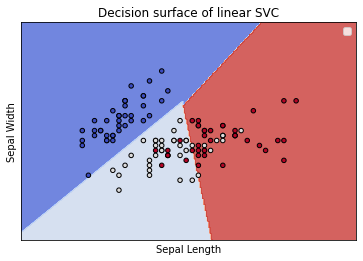

In [26]:
## I don't understand fully what half of this code does!
fig, ax = plt.subplots()
title = ('Decision surface of linear SVC')
# To create the mesh grid we use the first and second column
xx, yy = make_meshgrid(X_train[:, 0],X_train[:, 1])
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X_train[:, 0],X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

To test our model on the `test` data, we will **predict** it. **Keep in mind that since we trained with only two features, we should also test with the same two features as well**!

In [27]:
y_predicted = model.predict(X_test[:,0:2])
print(y_predicted)

[0 0 2 0 1 0 1 2 2 1 1 1 1 0 2 1 0 2 2 2 1 0 2 2 2 1 0 2 0 0]


Finally, we can compare the **model's accuracy** of the obtained labels in `y_predicted` against the ground truth in `y_test`:

In [28]:
## Print model's accuracy
comparison = y_predicted == y_test
print('Accuracy', sum(comparison)/len(comparison))

Accuracy 0.8333333333333334


How would you print the accuracy for each class?

In [29]:
## Use this cell to print the accuracy for each class
## Hint: Use the numpy.where() function to find where does a vector have a certain value i.e. 0/1/2
print('Setosa Acc',sum(y_test[np.where(y_test==0)]==y_predicted[np.where(y_test==0)])/len(y_test[np.where(y_test==0)]))
print('Versicolor Acc',sum(y_test[np.where(y_test==1)]==y_predicted[np.where(y_test==1)])/len(y_test[np.where(y_test==1)]))
print('Virginica Acc',sum(y_test[np.where(y_test==2)]==y_predicted[np.where(y_test==2)])/len(y_test[np.where(y_test==2)]))

Setosa Acc 1.0
Versicolor Acc 0.7
Virginica Acc 0.8


## Bonus

* Try to use different combinations of training/testing split, features used in the model, parameter, etc. Does the accuracy of your model improve? Is it better or worse compared to **Kmeans**?

* Check out how different kernel types affect the performance of the SVM classifier [here](https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html). Would you consider using a different kernel for this classifier?